In [1]:
import os
from tqdm.notebook import tqdm
import pandas
import numpy
import matplotlib.pyplot as plt

from ProblemInstance import ProblemInstance
from baseline_intra import bl_intra_1
from baseline_request import bl_req_FCFS
from baseline_pslice import bl_pslice
from baseline_pimlet import bl_pimlet
from our_approach import leader_follower

In [2]:
def get_xb_utilization(problem, plan):
    return problem.utilization_xb(*problem.get_pc_packages_from_plan(*plan))
def get_buf_utilization(problem, plan):
    return problem.utilization_buf(*problem.get_pc_packages_from_plan(*plan))

def bar_utilization(u, t, ax, xlim, ylim):
    # print(u)
    x = []
    accum = 0
    for time in t:
        x.append(accum)
        accum += time
    print(x)
    ax.bar(x, u, t, align="edge")
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.get_xaxis().set_visible(False)
    
def plot_utilization(utilization, time, ax, xlim, ylim, color, label):
    x = []
    y = []
    accum = 0
    for t, u in zip(time, utilization):
        x.append(accum)
        y.append(u*100)
        accum += t
        x.append(accum)
        y.append(u*100)
    x.append(accum)
    y.append(0)
    ax.plot(x, y, color=color, label=label)
    ax.fill_between(x, y, 0, facecolor=color, alpha=0.3)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)  # draw arrow
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)  # draw arrow
    
    ax.set_yticks([0, 25, 50, 75, 100], labels=["0", "", "50", "", "100"], fontsize=15)
    ax.grid()

In [3]:
fontsize = 15
neurosim_dir = "NetStructure/"
summary_file = "NeuroSIMOut/summary.csv"

color_map = ["#ff8884", "indianred", "#f8ac8c",  "#2878b5", '#80b1d3', "#9ac9db"]

predef_N_X = numpy.array([
    12000, 400, 15600, 12000, 3600, 3600, 3600, 512, 90808, 
    15608, 15608, 15200, 1000, 1000, 1000, 1000, 1000, 1000,])

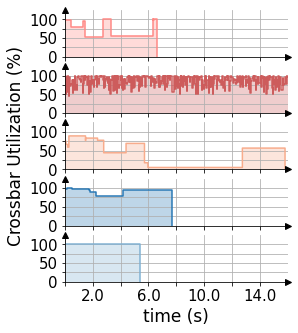

In [4]:
xlim = (0, 16e9)
ylim = (0, 125)
seed = 10
n_req = 50000


multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
nn_ids = numpy.arange(N_M)
multi_model_problem.get_exact_requests(nn_ids=nn_ids, n_x=predef_N_X[nn_ids])

fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(4,5))

plan_intra = bl_intra_1(multi_model_problem)
ax_our = plt.subplot(5,1,1)
plot_utilization(*(get_xb_utilization(multi_model_problem, plan_intra)), axes[0], xlim, ylim, color=color_map[0], label="Intra")

package_inter = bl_req_FCFS(multi_model_problem) 
ax_inter = plt.subplot(5,1,2)
plot_utilization(*multi_model_problem.utilization_xb(*package_inter), axes[1], xlim, ylim, color=color_map[1], label="Inter")


plan_pslice = bl_pslice(multi_model_problem)
ax_our = plt.subplot(5,1,3)
plot_utilization(*(get_xb_utilization(multi_model_problem, plan_pslice)), axes[2], xlim, ylim, color=color_map[2], label="PSLICE")
plt.ylabel("Crossbar Utilization (%)", fontsize=fontsize+2)

package_pimlet = bl_pimlet(multi_model_problem) 
ax_inter = plt.subplot(5,1,4)
plot_utilization(*multi_model_problem.utilization_xb(*package_pimlet), axes[3], xlim, ylim, color=color_map[3], label="PIMLet")


plan_our = leader_follower(multi_model_problem)
ax_our = plt.subplot(5,1,5)
plot_utilization(*(get_xb_utilization(multi_model_problem, plan_our)), axes[4], xlim, ylim, color=color_map[4], label="PIMShare")


x_ticks = numpy.arange(0,16,2) * 10e8
plt.xticks(x_ticks, ["" if i%2==0 else str(x/1e9) for i, x in enumerate(x_ticks)],fontsize=fontsize)
plt.yticks([0, 25, 50, 75, 100], labels=["0", "", "50", "", "100"])
plt.xlabel("time (s)", fontsize=fontsize+2)
# plt.text(xlim[1], 10, "1e8", fontsize=fontsize)

handlers = []
labels = []
h, l = fig.axes[0].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[1].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[2].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[3].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[4].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])

plt.show()

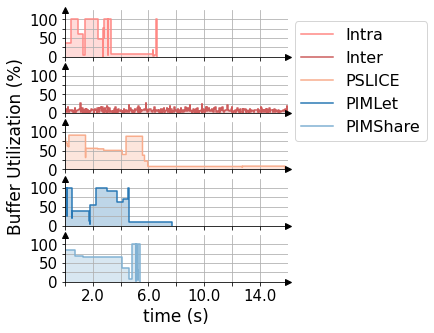

In [5]:
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(4, 5))

plan_intra = bl_intra_1(multi_model_problem)
ax_our = plt.subplot(5,1,1)
plot_utilization(*(get_buf_utilization(multi_model_problem, plan_intra)), axes[0], xlim, ylim, color=color_map[0], label="Intra")

package_inter = bl_req_FCFS(multi_model_problem) 
ax_inter = plt.subplot(5,1,2)
plot_utilization(*multi_model_problem.utilization_buf(*package_inter), axes[1], xlim, ylim, color=color_map[1], label="Inter")


plan_pslice = bl_pslice(multi_model_problem)
ax_our = plt.subplot(5,1,3)
plot_utilization(*(get_buf_utilization(multi_model_problem, plan_pslice)), axes[2], xlim, ylim, color=color_map[2], label="PSLICE")
plt.ylabel("Buffer Utilization (%)", fontsize=fontsize+2)

package_pimlet = bl_pimlet(multi_model_problem) 
ax_inter = plt.subplot(5,1,4)
plot_utilization(*multi_model_problem.utilization_buf(*package_pimlet), axes[3], xlim, ylim, color=color_map[3], label="PIMLet")


plan_our = leader_follower(multi_model_problem)
ax_our = plt.subplot(5,1,5)
plot_utilization(*(get_buf_utilization(multi_model_problem, plan_our)), axes[4], xlim, ylim, color=color_map[4], label="PIMShare")

plt.xticks(x_ticks, ["" if i%2==0 else str(x/1e9) for i, x in enumerate(x_ticks)],fontsize=fontsize)
plt.yticks([0, 25, 50, 75, 100], labels=["0", "", "50", "", "100"])
plt.xlabel("time (s)", fontsize=fontsize+2)

handlers = []
labels = []
h, l = fig.axes[0].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[1].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[2].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[3].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[4].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
plt.legend(handlers, labels, ncol=1, loc=(1.03,3), fontsize=fontsize+1)

plt.show()